#### **Assignment 1**
Goal: Predict house prices, `SalePrice`, using a regression model.<br>

#### Import necessary packages

In [41]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import f_oneway
from scipy.stats import pearsonr

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress UserWarning and ConvergenceWarning
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

#### Loading the dataset

In [42]:
# Loading the dataset
data = pd.read_excel("hw_1_house_price_data.xlsx")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90500
2904,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000
2905,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2906,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


#### Data Cleaning and Pre-processing

In [43]:
# Looking at dataset features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2908 non-null   int64  
 1   MSSubClass     2908 non-null   int64  
 2   MSZoning       2905 non-null   object 
 3   LotFrontage    2422 non-null   float64
 4   LotArea        2908 non-null   int64  
 5   Street         2908 non-null   object 
 6   Alley          197 non-null    object 
 7   LotShape       2908 non-null   object 
 8   LandContour    2908 non-null   object 
 9   Utilities      2906 non-null   object 
 10  LotConfig      2908 non-null   object 
 11  LandSlope      2908 non-null   object 
 12  Neighborhood   2908 non-null   object 
 13  Condition1     2908 non-null   object 
 14  Condition2     2908 non-null   object 
 15  BldgType       2908 non-null   object 
 16  HouseStyle     2908 non-null   object 
 17  OverallQual    2908 non-null   int64  
 18  OverallC

In [44]:
# Since ID is not reflecting true length of the dataset, drop the ID column and then add it properly. 
clean_data = data.drop("Id", axis= 1)

# Adding ID column
clean_data['ID'] = range(1, len(clean_data) + 1)

# Moving the ID column at the start of the dataset.
col = clean_data.pop('ID')
clean_data.insert(0, 'ID', col)

# Setting ID as the index column
clean_data.set_index('ID', inplace=True)
clean_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
ID,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90500
2905,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000
2906,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000


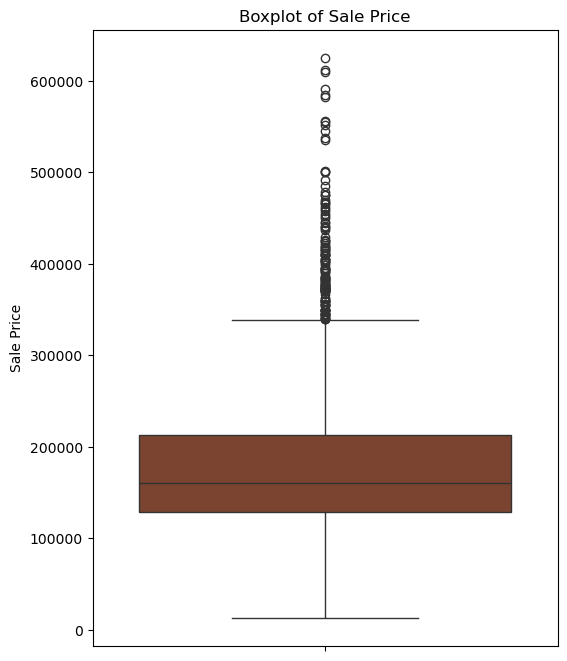

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the vertical boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=clean_data["SalePrice"], color="#873e23")

# Labels and title
plt.ylabel("Sale Price")
plt.title("Boxplot of Sale Price")
plt.show()



In [46]:
# locating all missing values in the dataset.
missing_data = clean_data.isnull().sum()
print("Columns with missing values:\n", missing_data[missing_data > 0])

Columns with missing values:
 MSZoning           3
LotFrontage      486
Alley           2711
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1760
MasVnrArea        23
BsmtQual          79
BsmtCond          80
BsmtExposure      80
BsmtFinType1      77
BsmtFinType2      78
Electrical         1
BsmtFullBath       1
BsmtHalfBath       1
KitchenQual        1
FireplaceQu     1416
GarageType       157
GarageYrBlt      158
GarageFinish     158
GarageQual       158
GarageCond       158
PoolQC          2902
Fence           2340
MiscFeature     2803
SaleType           1
dtype: int64


C:\Users\tsam755\AppData\Local\Temp\ipykernel_13024\936523760.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data_final.index, y=missing_data_final.values, palette="viridis")


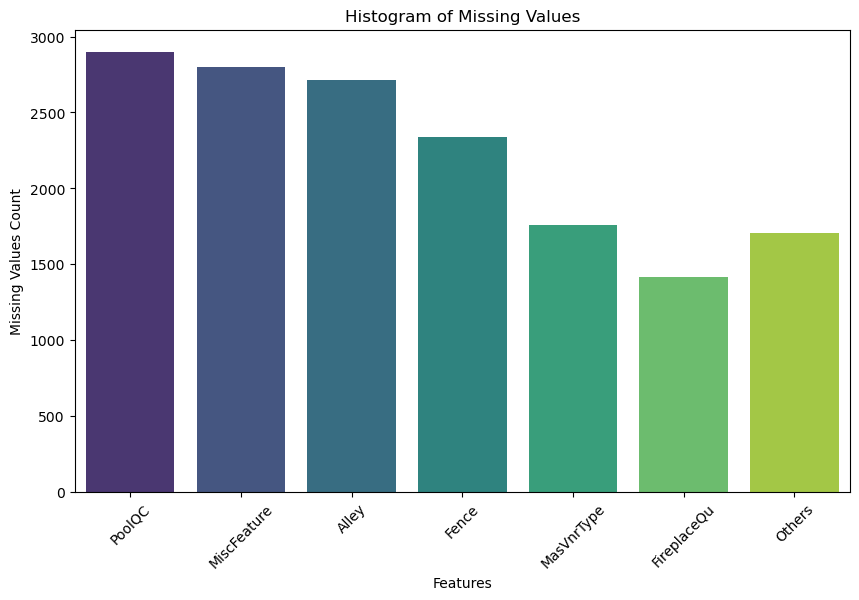

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values
missing_data = clean_data.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Only consider columns with missing values

# Sort by missing values count
missing_data_sorted = missing_data.sort_values(ascending=False)

# Identify top 6 features and group the rest as "Others"
top_6 = missing_data_sorted[:6]
others = missing_data_sorted[6:].sum()

# Create a new series including "Others"
missing_data_final = pd.concat([top_6, pd.Series({'Others': others})])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_final.index, y=missing_data_final.values, palette="viridis")

plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.title("Histogram of Missing Values")
plt.xticks(rotation=45)
plt.show()



In [48]:
# imputing values inplace of NAs in all columns.

clean_data['MSZoning'] = clean_data['MSZoning'].fillna('NZ')
clean_data['LotFrontage'] = clean_data['LotFrontage'].fillna(0)
clean_data['Alley'] = clean_data['Alley'].fillna('No Alley')
clean_data['Utilities'] = clean_data['Utilities'].fillna('No Info')
clean_data['MasVnrType'] = clean_data['MasVnrType'].fillna('No Info')
clean_data['MasVnrArea'] = clean_data['MasVnrArea'].fillna(0)
clean_data['BsmtQual'] = clean_data['BsmtQual'].fillna('No Info')
clean_data['BsmtCond'] = clean_data['BsmtCond'].fillna('No Info')
clean_data['BsmtExposure'] = clean_data['BsmtExposure'].fillna('No Basement')
clean_data['BsmtFinType1'] = clean_data['BsmtFinType1'].fillna('No Basement')
clean_data['BsmtFinType2'] = clean_data['FireplaceQu'].fillna('No Fireplace')
clean_data['GarageType'] = clean_data['GarageType'].fillna('No Garage')
clean_data['GarageYrBlt'] = clean_data['GarageYrBlt'].dropna()
clean_data['GarageFinish'] = clean_data['GarageFinish'].fillna("No Garage")
clean_data['GarageQual'] = clean_data['GarageQual'].fillna("Not Applicable")
clean_data['GarageCond'] = clean_data['GarageCond'].fillna("Not Applicable")
clean_data['GarageYrBlt'] = clean_data['GarageYrBlt'].fillna(0)
clean_data['PoolQC'] = clean_data['PoolQC'].fillna("Not Applicable")
clean_data['Fence'] = clean_data['Fence'].fillna("Not Applicable")
clean_data['MiscFeature'] = clean_data['MiscFeature'].fillna("No Extra Feature")
clean_data['SaleType'] = clean_data['SaleType'].fillna("No Info")
clean_data['FireplaceQu'] = clean_data['FireplaceQu'].fillna("No Fireplace")


In [49]:
# Rechecking missing values after imputing for NAs

missing_data = clean_data.isnull().sum()
print("Columns with missing values:\n", missing_data[missing_data > 0])

Columns with missing values:
 Exterior1st     1
Exterior2nd     1
Electrical      1
BsmtFullBath    1
BsmtHalfBath    1
KitchenQual     1
dtype: int64


In [50]:
# Dropping remaining NAs as they do not make a significant portion of the dataset.

final_data = clean_data.dropna()

# Printing the final dataset.
final_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
ID,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,Not Applicable,Not Applicable,No Extra Feature,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,Not Applicable,Not Applicable,No Extra Feature,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,Not Applicable,Not Applicable,No Extra Feature,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,Not Applicable,Not Applicable,No Extra Feature,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,Not Applicable,Not Applicable,No Extra Feature,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,160,RM,21.0,1936,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,Not Applicable,Not Applicable,No Extra Feature,0,6,2006,WD,Normal,90500
2905,160,RM,21.0,1894,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,Not Applicable,Not Applicable,No Extra Feature,0,4,2006,WD,Abnorml,71000
2906,20,RL,160.0,20000,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,Not Applicable,Not Applicable,No Extra Feature,0,9,2006,WD,Abnorml,131000


In [51]:
# Checking if all NAs have been successfully dropped. 

missing_data = final_data.isnull().sum()
print("Columns with missing values:\n", missing_data[missing_data > 0])

Columns with missing values:
 Series([], dtype: int64)


#### Variable Transformation

In [52]:
# Transforming OverallQual and replacing it over the original one.

conditions = [
    (final_data["OverallQual"].between(0, 4, inclusive='both')),  # 0 to 4 inclusive
    (final_data["OverallQual"] == 5),                             # Exactly 5
    (final_data["OverallQual"].between(6, 10, inclusive='both'))  # 6 to 10 inclusive
]
choices = ['below average', 'average', 'above average']

# Assign the categories
final_data["OverallQual"] = np.select(conditions , choices)

C:\Users\tsam755\AppData\Local\Temp\ipykernel_13024\3637728225.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["OverallQual"] = np.select(conditions , choices)


In [53]:
# Transforming OverallCond and replacing it over the original one.

conditions = [
    (final_data["OverallCond"].between(0, 4, inclusive='both')),  # 0 to 4 inclusive
    (final_data["OverallCond"] == 5),                             # Exactly 5
    (final_data["OverallCond"].between(6, 10, inclusive='both'))  # 6 to 10 inclusive
]
choices = ['below average', 'average', 'above average']

# Assign the categories
final_data["OverallCond"] = np.select(conditions, choices)

C:\Users\tsam755\AppData\Local\Temp\ipykernel_13024\139018321.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["OverallCond"] = np.select(conditions, choices)


In [54]:
# Transforming MoSold and replacing it over the original one.
# Converting month sold into quarters

conditions = [
    (final_data["MoSold"].between(1, 3, inclusive='both')),  # Q1
    (final_data["MoSold"].between(4 , 6 , inclusive = 'both')), # Q2
    (final_data["MoSold"].between(7 , 9, inclusive = 'both')), # Q3
    (final_data["MoSold"] > 9)  # Q4
]
choices = ['Q1', 'Q2', 'Q3' , "Q4"]

# Assign the categories
final_data["MoSold"] = np.select(conditions, choices)

C:\Users\tsam755\AppData\Local\Temp\ipykernel_13024\2436265737.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["MoSold"] = np.select(conditions, choices)


In [55]:
# Calculate the number of decades ago the property was built using the 'YearBuilt' column

current_year = 2024

# Calculate the number of decades
final_data['DecadeBuilt'] = (current_year - final_data['YearBuilt']) // 10

# Create the labels for each decade
final_data['DecadeLabel'] = final_data['DecadeBuilt'].apply(lambda x: f"{x} decade ago" if x == 1 else f"{x} decades ago")

final_data = final_data.drop("DecadeBuilt", axis=1)

# Print the updated DataFrame with the new column
print(final_data[['YearBuilt', 'DecadeLabel']].head())


    YearBuilt     DecadeLabel
ID                           
1        2003   2 decades ago
2        1976   4 decades ago
3        2001   2 decades ago
4        1915  10 decades ago
5        2000   2 decades ago


C:\Users\tsam755\AppData\Local\Temp\ipykernel_13024\2322805405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['DecadeBuilt'] = (current_year - final_data['YearBuilt']) // 10
C:\Users\tsam755\AppData\Local\Temp\ipykernel_13024\2322805405.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['DecadeLabel'] = final_data['DecadeBuilt'].apply(lambda x: f"{x} decade ago" if x == 1 else f"{x} decades ago")


In [56]:
# Create a new column RemodelStatus to see after how long was the property remodeled.

final_data['RemodelStatus'] = final_data.apply(
    lambda row: "no remod" if row['YearBuilt'] == row['YearRemodAdd'] else f"{row['YearRemodAdd'] - row['YearBuilt']} years",
    axis=1
)

# Print the updated DataFrame with the new column
print(final_data[['YearBuilt', 'YearRemodAdd', 'RemodelStatus']].head())


    YearBuilt  YearRemodAdd RemodelStatus
ID                                       
1        2003          2003      no remod
2        1976          1976      no remod
3        2001          2002       1 years
4        1915          1970      55 years
5        2000          2000      no remod


#### Removig Outliers

In [57]:
# Q1 = final_data['SalePrice'].quantile(0.25) # 25th percentile
# Q3 = final_data['SalePrice'].quantile(0.75) # 75th percentile 
# IQR = Q3 - Q1 # Interquartile Range
# # lower_bound = Q1 - 1.5 * IQR # Lower threshold for outliers
# upper_bound = Q3 + 1.5 * IQR # Upper threshold for outliers

# final_data = final_data[(final_data['SalePrice'] <= upper_bound)]
# print(f"Original final_dataset size: {len(final_data)} rows")
# print(f"final_dataset size after removing outliers: {len(final_data)} rows") 
# print(f"Removed {len(final_data) - len(final_data)} outliers") 
# # print(f"Outlier range: Below ${lower_bound:.2f} or above ${upper_bound:.2f}")


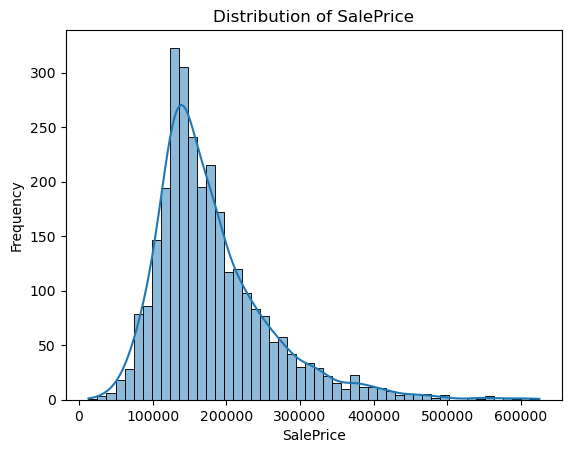

Skewness of SalePrice: 1.58


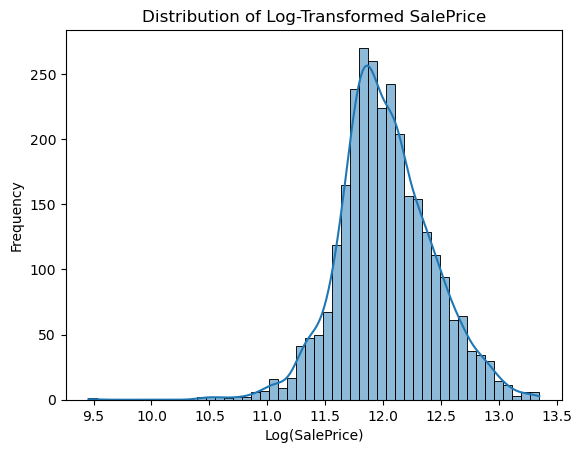

Skewness of Log(SalePrice): 0.04


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram with KDE for SalePrice
sns.histplot(final_data['SalePrice'], kde=True, bins=50)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Print skewness of SalePrice
print(f"Skewness of SalePrice: {final_data['SalePrice'].skew():.2f}")

import numpy as np

# Apply log transformation
final_data['Log_SalePrice'] = np.log1p(final_data['SalePrice'])

# Check the new distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_data['Log_SalePrice'], kde=True, bins=50)
plt.title("Distribution of Log-Transformed SalePrice")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

# Check skewness after log transformation
print(f"Skewness of Log(SalePrice): {final_data['Log_SalePrice'].skew():.2f}")


In [59]:
final_data = final_data.drop(columns = "SalePrice")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, 1 to 2908
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2904 non-null   int64  
 1   MSZoning       2904 non-null   object 
 2   LotFrontage    2904 non-null   float64
 3   LotArea        2904 non-null   int64  
 4   Street         2904 non-null   object 
 5   Alley          2904 non-null   object 
 6   LotShape       2904 non-null   object 
 7   LandContour    2904 non-null   object 
 8   Utilities      2904 non-null   object 
 9   LotConfig      2904 non-null   object 
 10  LandSlope      2904 non-null   object 
 11  Neighborhood   2904 non-null   object 
 12  Condition1     2904 non-null   object 
 13  Condition2     2904 non-null   object 
 14  BldgType       2904 non-null   object 
 15  HouseStyle     2904 non-null   object 
 16  OverallQual    2904 non-null   object 
 17  OverallCond    2904 non-null   object 
 18  YearBuilt    

#### Locating categorical and numeric variables

In [60]:
# Pulling all categorical variables togerther. 

string_columns = final_data.select_dtypes(include=['object']).columns.tolist()

# Print the list of string columns
print("Columns with string data:")
for col in string_columns:
    print(f"- {col}")

Columns with string data:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- OverallQual
- OverallCond
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Heating
- HeatingQC
- CentralAir
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- MoSold
- SaleType
- SaleCondition
- DecadeLabel
- RemodelStatus


In [61]:
# Pulling all integer columns together. 

int_columns = final_data.select_dtypes(include=['float64', "int64"]).columns.tolist()

# Print the list of string columns
print("Columns with int data:")
for col in int_columns:
    print(f"- {col}")

Columns with int data:
- MSSubClass
- LotFrontage
- LotArea
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- YrSold
- Log_SalePrice


#### Variable Selection

Statistical Tests

In [62]:
# Running ANOVA to see what categorical variables are significant with target variable "Sales Price"

# Define your categorical columns list
categorical_columns = string_columns 

# Target variable
target = 'Log_SalePrice' 

# List to store significant variables
significant_cat_vars = []

# Loop through categorical columns and perform ANOVA
for col in categorical_columns:
    groups = [final_data[final_data[col] == val][target] for val in final_data[col].dropna().unique()]
    
    # Ensure at least 2 groups exist
    if len(groups) > 1:
        f_stat, p = f_oneway(*groups)
        
        if p < 0.5:  # Filtering significant variables
            significant_cat_vars.append(col)

# Storing only significant variables for feature selection. 

print("Significant categorical variables:", significant_cat_vars)


Significant categorical variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition', 'DecadeLabel', 'RemodelStatus']


In [63]:
# Running correlation test between numeric variables. 

# Select only numeric columns
numeric_columns = int_columns

# Loop through all numeric columns and calculate correlation with 'SalePrice'
correlations = {}

for col in numeric_columns:
    if col != 'Log_SalePrice':  # Skip the target variable
        corr, p_value = pearsonr(final_data[col], final_data['Log_SalePrice'])
        correlations[col] = {'Correlation': corr, 'P-value': p_value}

# Convert the results to a DataFrame for easier reading
correlation_df = pd.DataFrame(correlations).T  # Transpose to have columns as rows

# Filter for correlations >= 0.35 or <= -0.35
# Threshold is set at 0.35 so that all variables that are moderate to high (positive and negative) correlated are selected. 
filtered_df = correlation_df[(correlation_df['Correlation'] >= 0.35) | (correlation_df['Correlation'] <= -0.35)]

# Store the names of the filtered variables in a list
significant_int_vars = filtered_df.index.tolist()

# Print the filtered results
print("Variables with correlation >= 0.35 or <= -0.35:")
print(filtered_df)
print("\nList of significant variables:", significant_int_vars)

# Now you can use 'significant_vars' later in your linear regression

Variables with correlation >= 0.35 or <= -0.35:
              Correlation        P-value
YearBuilt        0.620061  3.740864e-308
YearRemodAdd     0.588309  5.015242e-270
MasVnrArea       0.447359  6.319793e-143
BsmtFinSF1       0.419564  3.398249e-124
TotalBsmtSF      0.652206   0.000000e+00
1stFlrSF         0.623592  1.142510e-312
GrLivArea        0.716116   0.000000e+00
FullBath         0.584264  1.812596e-265
TotRmsAbvGrd     0.499546  3.684890e-183
Fireplaces       0.487458  3.290296e-173
GarageCars       0.683669   0.000000e+00
GarageArea       0.661008   0.000000e+00

List of significant variables: ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']


#### Final Target variable list before running the model

In [64]:
# Combine the two lists and make sure 'SalePrice' is included
target_variables = significant_cat_vars + significant_int_vars

# Ensure 'SalePrice' is in the list
if 'Log_SalePrice' not in target_variables:
    target_variables.append('Log_SalePrice')

print(target_variables)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition', 'DecadeLabel', 'RemodelStatus', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'Log_SalePrice']


#### Creating the final dataset by dropping all other variables except the one in the list

In [65]:
test_data = final_data[target_variables]
test_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,Log_SalePrice
ID,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,706,856,856,1710,2,8,0,2,548,12.247699
2,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,978,1262,1262,1262,2,6,1,2,460,12.109016
3,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,486,920,920,1786,2,6,1,2,608,12.317171
4,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,216,756,961,1717,1,7,1,3,642,11.849405
5,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,655,1145,1145,2198,2,9,1,3,836,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,RM,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0,546,546,1092,1,5,0,0,0,11.413116
2905,RM,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,252,546,546,1092,1,6,0,1,286,11.170449
2906,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,1224,1224,1224,1224,1,7,1,2,576,11.782960


#### Model Selection - Linear // Ridge // Lasso

In [66]:
# Define target and features
X = test_data.drop(columns=['Log_SalePrice'])  # Predictors
y = test_data['Log_SalePrice']  # Target variable

# Identify categorical features
categorical_features = significant_cat_vars

# Preprocessing: One-hot encoding for categorical variables and standardization for continuous features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), [col for col in significant_int_vars if col not in ['ID', 'Log_SalePrice']]),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108) # Data is split as 80% train and 20% test.

Hyper parameter tuning to find the best alpha for Lasso and Ridge

In [67]:
# Define the range of alpha values to test
param_grid_test = [0.1, 1.0, 10.0, 100.0]

# Define Ridge pipeline and hyperparameter tuning
ridge_pipeline = make_pipeline(preprocessor, Ridge())
ridge_param_grid = {'ridge__alpha': param_grid_test} 
ridge_model = GridSearchCV(ridge_pipeline, param_grid=ridge_param_grid, cv=20, scoring='neg_mean_squared_error') # 10 fold cross validation

# Define Lasso pipeline and hyperparameter tuning
lasso_pipeline = make_pipeline(preprocessor, Lasso())
lasso_param_grid = {'lasso__alpha': param_grid_test} 
lasso_model = GridSearchCV(lasso_pipeline, param_grid=lasso_param_grid, cv=20, scoring='neg_mean_squared_error') # 10 fold cross validation

# Fit the models to your data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Access the best alpha values to use on the train data
print("Best Ridge alpha:", ridge_model.best_params_['ridge__alpha'])
print("Best Lasso alpha:", lasso_model.best_params_['lasso__alpha'])


Best Ridge alpha: 10.0
Best Lasso alpha: 0.1


Train the models using the best alpha predictor

In [68]:
# Define models using the best alpha
lr_model = make_pipeline( preprocessor, LinearRegression() )  # Linear regression model
ridge_model = make_pipeline(preprocessor, Ridge(alpha=10))  # Ridge regression model
lasso_model = make_pipeline( preprocessor, Lasso(alpha=0.1))  # Lasso regression model

# Train models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predictions on training data
y_pred_lr = lr_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_train)

# Compute MSE on training data
mse_train_lr = mean_squared_error(y_train, y_pred_lr)
mse_train_ridge = mean_squared_error(y_train, y_pred_ridge)
mse_train_lasso = mean_squared_error(y_train, y_pred_lasso)

# Print MSE to compare
print(f'Linear Regression Train MSE: {mse_train_lr:.2f}')
print(f'Ridge Regression Train MSE: {mse_train_ridge:.2f}')
print(f'Lasso Regression Train MSE: {mse_train_lasso:.2f}')




Linear Regression Train MSE: 0.01
Ridge Regression Train MSE: 0.01
Lasso Regression Train MSE: 0.05


#### Model Performance on Test Data

In [69]:
#  Define models
y_pred_lr = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Test Lasso model
mse_lr = mean_squared_error(y_test, y_pred_lr)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Compare errors
print(f'Linear Regression MSE: {mse_lr:.2f}')
print(f"Ridge MSE: {ridge_mse:.2f}")
print(f"Lasso MSE: {lasso_mse:.2f}")

Linear Regression MSE: 0.02
Ridge MSE: 0.01
Lasso MSE: 0.05


#### Extracting Coeffecients

In [70]:
lr_coefs = lr_model.named_steps['linearregression'].coef_
ridge_coefs = ridge_model.named_steps['ridge'].coef_
lasso_coefs = lasso_model.named_steps['lasso'].coef_

#### Extracting variable names for the coeffecients

In [71]:
# Extract the feature names from the preprocessor
feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out().tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
)

# Extract the coefficients from the trained Ridge model
ridge_coefs = ridge_model.named_steps['ridge'].coef_

# Create a DataFrame with variable names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coef': ridge_coefs,
    'Abs_Coef': np.abs(ridge_coefs)
})

# Sort the DataFrame by absolute value of coefficients in descending order
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=False)

# Display the sorted DataFrame
coef_df


,Variable,Coef,Abs_Coef
87,OverallCond_below average,-0.149314,0.149314
6,GrLivArea,0.138578,0.138578
85,OverallQual_below average,-0.108446,0.108446
75,BldgType_Twnhs,-0.104691,0.104691
39,Neighborhood_Crawfor,0.088199,0.088199
...,...,...,...
160,BsmtFinType2_Fa,-0.000219,0.000219
187,FireplaceQu_Fa,-0.000219,0.000219
228,SaleType_ConLD,0.000137,0.000137
310,RemodelStatus_46 years,0.000047,0.000047


#### Top 30 variables that influence house prices

In [72]:
coef_df.head(30)

,Variable,Coef,Abs_Coef
87,OverallCond_below average,-0.149314,0.149314
6,GrLivArea,0.138578,0.138578
85,OverallQual_below average,-0.108446,0.108446
75,BldgType_Twnhs,-0.104691,0.104691
39,Neighborhood_Crawfor,0.088199,0.088199
186,Functional_Typ,0.085804,0.085804
311,RemodelStatus_47 years,-0.084884,0.084884
235,SaleCondition_AdjLand,0.083975,0.083975
74,BldgType_Duplex,-0.082927,0.082927
178,KitchenQual_Fa,-0.082701,0.082701


#### Bottom 30 variabeles that influence house prices

In [73]:
coef_df.tail(30)

,Variable,Coef,Abs_Coef
350,RemodelStatus_83 years,0.002060,0.002060
290,RemodelStatus_28 years,-0.002050,0.002050
118,Exterior2nd_ImStucc,-0.002042,0.002042
111,Exterior1st_WdShing,0.001978,0.001978
275,RemodelStatus_14 years,-0.001771,0.001771
271,RemodelStatus_122 years,-0.001680,0.001680
324,RemodelStatus_59 years,0.001613,0.001613
230,SaleType_ConLw,0.001561,0.001561
73,BldgType_2fmCon,0.001416,0.001416
260,RemodelStatus_106 years,0.001412,0.001412


#### Interpretation of findings

This project developed regression models to predict house prices (SalePrice) using a dataset of 2,908 houses. <br> Data preprocessing involved handling missing values 
(e.g LotFrontage filled with 0), transforming variables (e.g., OverallQual and OverallCond into "below average," "average," "above average";
MoSold into quarters; YearBuilt into DecadeLabel), and selecting 59 significant features (47 categorical via ANOVA, 12 numeric via Pearson correlation >= 0.35 & <= -0.35).
The dataset was split 80% train and 20% test, and three models—Linear Regression, Ridge (alpha = 10), and Lasso (alpha = 100)— were trained and tuned via GridSearchCV with 10-fold cross-validation.

Best Model: Ridge Regression (MSE = 407,242,388.79 on test data) outperforms Linear and Lasso, balancing fit and generalization. <br>
Overfitting: Linear Regression has the lowest training MSE but higher test MSE, indicating overfitting to the training data.

Ridge Regression outperformed others on test data (MSE = 407,242,388.79) compared to Linear (481,435,075.15) and Lasso (413,429,803.46), suggesting better generalization. <br> There are a total of 366 variables that impact house prices. <br> Top predictors from Ridge coefficients include GrLivArea (ground above living area in square feet) of 29,774 - a positive beta coeffient which means if all other factors are held constant, with a unit increase in GrLivArea, the house price will increase by $29,774. <br> If the BldgType (building type) is Duplex it will negativly impact house prices. It has a beta coefecient of -25,066 which means all other factos held constant, if the property is a duplex, the price will decrease by $25,066.

Linear Regression Train MSE: 0.0099
Linear Regression Test MSE: 0.0155
--------------------------------------------------
Ridge Regression Train MSE: 0.0112
Ridge Regression Test MSE: 0.0118
--------------------------------------------------
Lasso Regression Train MSE: 0.0482
Lasso Regression Test MSE: 0.0473


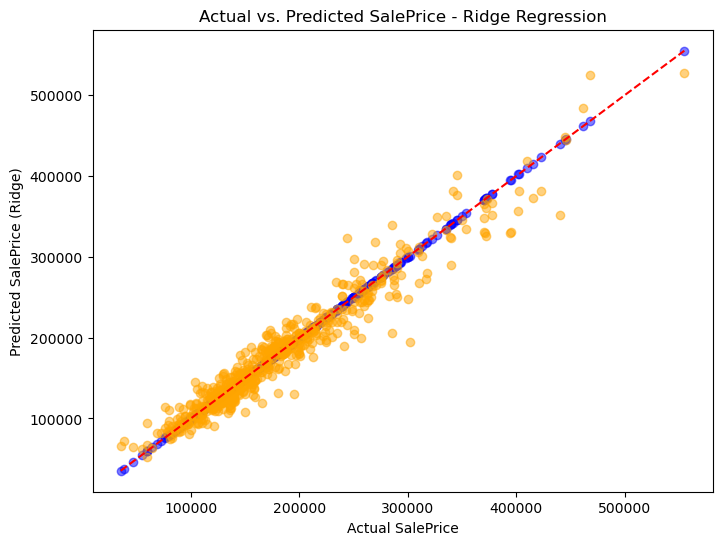

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

# Define models using the best alpha
lr_model = make_pipeline(preprocessor, LinearRegression())  # Linear Regression model
ridge_model = make_pipeline(preprocessor, Ridge(alpha=10))  # Ridge Regression model
lasso_model = make_pipeline(preprocessor, Lasso(alpha=0.1))  # Lasso Regression model

# Train models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predictions on training data
y_pred_train_lr = lr_model.predict(X_train)
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_train_lasso = lasso_model.predict(X_train)

# Compute MSE on training data
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)

# Predictions on test data
y_pred_test_lr = lr_model.predict(X_test)
y_pred_test_ridge = ridge_model.predict(X_test)
y_pred_test_lasso = lasso_model.predict(X_test)

# Compute MSE on test data
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

# Print MSE to compare train and test errors
print(f'Linear Regression Train MSE: {mse_train_lr:.4f}')
print(f'Linear Regression Test MSE: {mse_test_lr:.4f}')
print('-' * 50)
print(f'Ridge Regression Train MSE: {mse_train_ridge:.4f}')
print(f'Ridge Regression Test MSE: {mse_test_ridge:.4f}')
print('-' * 50)
print(f'Lasso Regression Train MSE: {mse_train_lasso:.4f}')
print(f'Lasso Regression Test MSE: {mse_test_lasso:.4f}')

# Convert predictions back to original scale (exponentiate)
y_pred_actual_lr = np.expm1(y_pred_test_lr)
y_pred_actual_ridge = np.expm1(y_pred_test_ridge)
y_pred_actual_lasso = np.expm1(y_pred_test_lasso)
y_actual = np.expm1(y_test)  # Convert actual values back+

# Plot Actual vs. Predicted for Ridge (Best Generalizing Model)
plt.figure(figsize=(8, 6))
#plt.scatter(y_actual, y_pred_actual_ridge, alpha=0.5 , color='red')
# Plot actual values (blue)
plt.scatter(y_actual, y_actual, alpha=0.5, color='blue', label="Actual Values")
# Plot predicted values (red)
plt.scatter(y_actual, y_pred_actual_ridge, alpha=0.5, color='orange', label="Predicted Values")

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice (Ridge)")
plt.title("Actual vs. Predicted SalePrice - Ridge Regression")
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], linestyle='dashed', color='red')  # 45-degree line
plt.show()


In [75]:
# Compute MSE on training data
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)

# Compute MSE on test data
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)


# Convert log MSE back to dollar values
mse_train_lr_dollar = np.expm1(mse_train_lr)
mse_test_lr_dollar = np.expm1(mse_test_lr)

mse_train_ridge_dollar = np.expm1(mse_train_ridge)
mse_test_ridge_dollar = np.expm1(mse_test_ridge)

mse_train_lasso_dollar = np.expm1(mse_train_lasso)
mse_test_lasso_dollar = np.expm1(mse_test_lasso)

# Print results in dollars
print(f'Linear Regression Train MSE ($): ${mse_train_lr_dollar:.2f}')
print(f'Linear Regression Test MSE ($): ${mse_test_lr_dollar:.2f}')
print('-' * 50)
print(f'Ridge Regression Train MSE ($): ${mse_train_ridge_dollar:.2f}')
print(f'Ridge Regression Test MSE ($): ${mse_test_ridge_dollar:.2f}')
print('-' * 50)
print(f'Lasso Regression Train MSE ($): ${mse_train_lasso_dollar:.2f}')
print(f'Lasso Regression Test MSE ($): ${mse_test_lasso_dollar:.2f}')

Linear Regression Train MSE ($): $0.01
Linear Regression Test MSE ($): $0.02
--------------------------------------------------
Ridge Regression Train MSE ($): $0.01
Ridge Regression Test MSE ($): $0.01
--------------------------------------------------
Lasso Regression Train MSE ($): $0.05
Lasso Regression Test MSE ($): $0.05


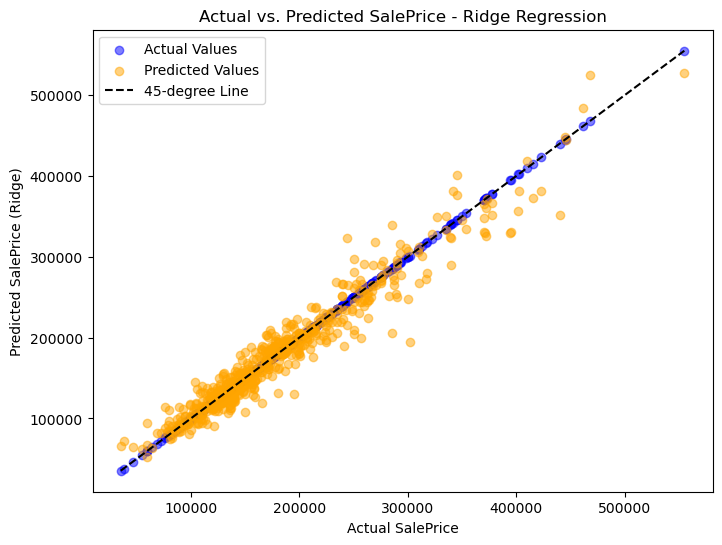

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot actual values (blue)
plt.scatter(y_actual, y_actual, alpha=0.5, color='blue', label="Actual Values")

# Plot predicted values (red)
plt.scatter(y_actual, y_pred_actual_ridge, alpha=0.5, color='orange', label="Predicted Values")

# 45-degree line (black)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], linestyle='dashed', color='black', label="45-degree Line")

# Labels and title
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice (Ridge)")
plt.title("Actual vs. Predicted SalePrice - Ridge Regression")

# Add legend
plt.legend()

# Show plot
plt.show()
